# **МЛ. Контест 1.**

## Подготовка данных

In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим файл "train.csv" с обучающей выборкой.

In [437]:
x_train = pd.read_csv("train.csv")
x_train.dropna(how='any', inplace=True)
x_train = x_train.drop_duplicates(keep='last')
x_train = x_train.loc[abs(x_train['RiskScore']) < 300]
x_train.info()
# x_train.isnull().sum()
# y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9332 entries, 0 to 11014
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             9332 non-null   object 
 1   Age                         9332 non-null   float64
 2   AnnualIncome                9332 non-null   float64
 3   CreditScore                 9332 non-null   float64
 4   LoanAmount                  9332 non-null   float64
 5   LoanDuration                9332 non-null   float64
 6   MaritalStatus               9332 non-null   object 
 7   NumberOfDependents          9332 non-null   float64
 8   HomeOwnershipStatus         9332 non-null   object 
 9   MonthlyDebtPayments         9332 non-null   float64
 10  CreditCardUtilizationRate   9332 non-null   float64
 11  NumberOfOpenCreditLines     9332 non-null   float64
 12  NumberOfCreditInquiries     9332 non-null   float64
 13  DebtToIncomeRatio           9332 non-

In [438]:
y_train = x_train.pop("RiskScore")
x_train = x_train.dropna(axis=1)

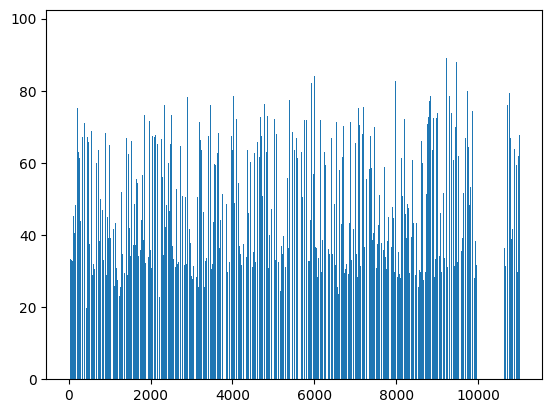

In [363]:
plt.bar(y_train.index, y_train.values)
plt.show()

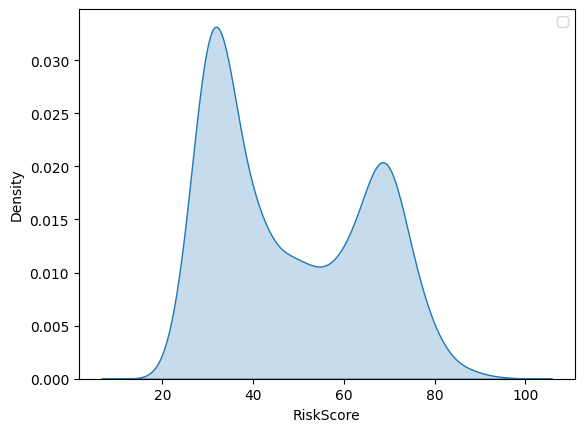

In [317]:
sns.kdeplot(y_train, fill=True)
plt.legend()
plt.show()

Столбец с датой (ApplicationDate), исходя из человеческой логики, не имеет значения. Не важно, когда человек взял кредит, а важно, какой человек взял кредит (какой у него характер, сколько у него денег, дорожит ли он жизнью и т. д.). Поэтому просто удалим этот столбец.

In [439]:
x_train.pop("ApplicationDate")
x_train

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,0.151985,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0
1,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,0.175693,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0
2,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,0.444605,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0
3,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,0.188452,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0
4,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,0.273431,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,47.0,88686.0,648.0,5472.0,12.0,Divorced,2.0,Rent,98.0,0.112650,...,4.0,Employed,Bachelor,23.0,121698.0,0.156472,0.164928,497.756143,0.080611,1.0
11011,39.0,300000.0,850.0,7721.0,72.0,Divorced,5.0,Own,276.0,0.215136,...,2.0,Employed,Associate,16.0,18607.0,0.107721,0.108596,146.407421,0.016896,1.0
11012,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,0.477742,...,4.0,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0
11013,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,0.322554,...,3.0,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0


Столбцы MaritalStatus, HomeOwnershipStatus, EmploymentStatus, EducationLevel, LoanPurpose содержат текстовые данные. При этом возможных вариантов заполнения каждого из этих столбцов не так уж много (3-5), поэтому используем One Hot encoding для каждого их этих столбцов. Столбец с пропусками просто удалим.

In [440]:
x_train = pd.get_dummies(x_train, columns=['MaritalStatus', 'HomeOwnershipStatus',
                                           'EmploymentStatus', 'EducationLevel',
                                           'LoanPurpose'], drop_first=True)
x_train

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,27.0,66829.0,549.0,17290.0,60.0,1.0,1095.0,0.151985,2.0,1.0,...,False,False,False,False,False,False,False,True,False,False
1,55.0,172147.0,850.0,16110.0,36.0,1.0,211.0,0.175693,3.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,51.0,300000.0,850.0,38436.0,36.0,0.0,546.0,0.444605,3.0,0.0,...,False,False,True,False,False,False,False,True,False,False
3,25.0,34683.0,847.0,19186.0,48.0,0.0,153.0,0.188452,7.0,0.0,...,False,False,False,False,True,False,True,False,False,False
4,55.0,300000.0,850.0,30437.0,48.0,2.0,562.0,0.273431,3.0,1.0,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,47.0,88686.0,648.0,5472.0,12.0,2.0,98.0,0.112650,8.0,1.0,...,False,False,True,False,False,False,False,False,True,False
11011,39.0,300000.0,850.0,7721.0,72.0,5.0,276.0,0.215136,2.0,1.0,...,False,False,False,False,False,False,False,False,True,False
11012,57.0,300000.0,850.0,14756.0,48.0,2.0,620.0,0.477742,1.0,3.0,...,False,False,False,False,False,False,False,True,False,False
11013,28.0,15000.0,300.0,51361.0,96.0,1.0,696.0,0.322554,2.0,0.0,...,False,False,True,False,False,False,False,False,True,False


In [441]:
# x_train = x_train.drop("CreditScore", axis=1)
x_train = x_train.drop("BaseInterestRate", axis=1)
x_train = x_train.drop("AnnualIncome", axis=1)
x_train = x_train.drop("InterestRate", axis=1)
x_train = x_train.drop("MonthlyLoanPayment", axis=1)
# x_train = x_train.drop("LoanApproved", axis=1)
x_train = x_train.drop(["NetWorth", "Experience"], axis=1)
# x_train = x_train.drop([, "TotalAssets", "Age"], axis=1)

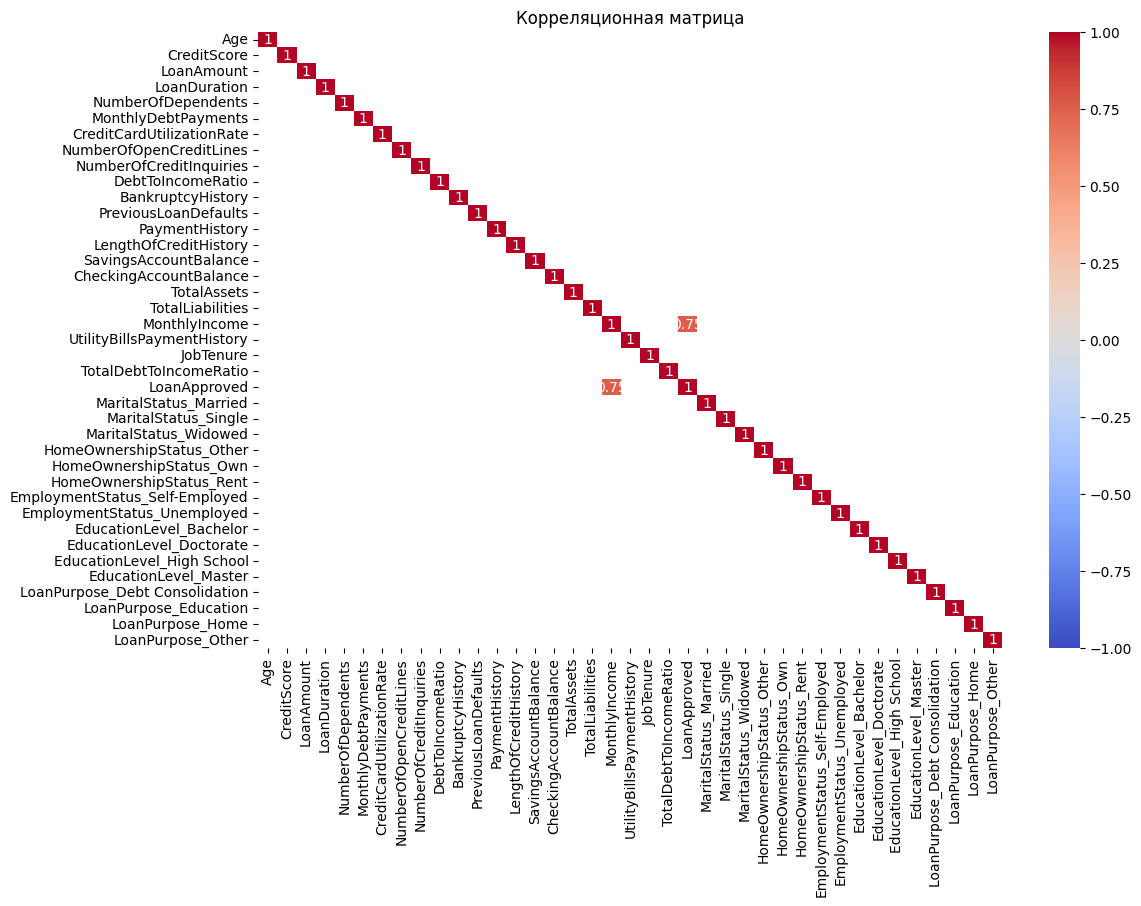

In [442]:
corr_matrix = x_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[corr_matrix.abs() >= 0.7], annot=True,  cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

### Работа с пропусками

In [443]:
names_of_columns = list(x_train.columns)
for col in names_of_columns:
  x_train[col].fillna(x_train[col].mean(), inplace=True)

y_train.fillna(y_train.mean(), inplace=True)

<ipython-input-443-399c3fdf4eaa>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train[col].fillna(x_train[col].mean(), inplace=True)


### График корреляции

### Нормализация

In [448]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
# x_train = scaler.fit_transform(x_train)
print("Standardized Data (Z-score Normalization):")
print(x_train)


Standardized Data (Z-score Normalization):
           Age  CreditScore  LoanAmount  LoanDuration  NumberOfDependents  \
0    -1.111860    -0.736675   -0.458262      0.271045           -0.399683   
1     1.305009     0.981312   -0.501464     -0.712006           -0.399683   
2     0.959742     0.981312    0.315946     -0.712006           -1.105025   
3    -1.284494     0.964189   -0.388844     -0.220481           -1.105025   
4     1.305009     0.981312    0.023083     -0.220481            0.305658   
...        ...          ...         ...           ...                 ...   
9327  0.614475    -0.171623   -0.890948     -1.695056            0.305658   
9328 -0.076059     0.981312   -0.808607      0.762570            2.421682   
9329  1.477643     0.981312   -0.551038     -0.220481            0.305658   
9330 -1.025543    -2.157867    0.789162      1.745620           -0.399683   
9331 -1.457127    -2.146452    0.033590      0.762570            1.010999   

      MonthlyDebtPayments  Credi

In [396]:
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [349]:
# reg = ElasticNet(alpha=0.001, l1_ratio=0.9).fit(x_train, y_train)
reg = Ridge(alpha=0.5).fit(x_train, y_train)
pr = reg.predict(x_train)

mean_squared_error(y_train, pr)

91.46487444501973

In [281]:
from sklearn.linear_model import LinearRegression

In [445]:
sk_reg = LinearRegression().fit(x_train, y_train)
train_predictions = sk_reg.predict(x_train)
mean_squared_error(y_train, train_predictions)

19.064215496232798

In [446]:
x_test = pd.read_csv("test.csv")

In [447]:
x_test.pop("ApplicationDate")
x_test.pop("ID")
x_test

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,49,207095,850,14458,60,Single,0,Rent,376,0.077124,...,6,Employed,High School,23,10626,0.104458,0.125350,325.532336,0.040650,1
1,28,64653,674,65491,48,Single,2,Own,238,0.073977,...,3,Employed,High School,3,299024,0.233491,0.260561,2210.247757,0.454410,0
2,41,300000,768,16811,60,Single,1,Own,469,0.331499,...,3,Employed,High School,19,6979,0.147811,0.154571,403.977431,0.034919,1
3,50,300000,850,48737,36,Divorced,0,Mortgage,567,0.544696,...,3,Self-Employed,Bachelor,26,8438,0.118737,0.099712,1571.946906,0.085558,1
4,35,300000,672,51916,60,Single,6,Mortgage,106,0.436103,...,7,Employed,Associate,12,436216,0.230916,0.237727,1486.675235,0.063707,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40,300000,850,12696,60,Married,1,Other,434,0.062521,...,3,Self-Employed,Master,19,10957,0.102696,0.094445,266.295150,0.028012,1
4996,39,75014,572,49380,48,Married,0,Mortgage,97,0.057142,...,3,Employed,Master,16,7587,0.268380,0.302377,1784.809960,0.301033,0
4997,43,15000,454,32810,72,Divorced,1,Other,289,0.403643,...,6,Employed,Bachelor,17,403922,0.330810,0.283165,951.731011,0.992585,0
4998,53,98467,850,28446,96,Single,1,Own,213,0.137445,...,6,Self-Employed,High School,30,5652,0.148446,0.163516,532.966868,0.090910,0


In [301]:
# categories = x_test["MaritalStatus"].unique()
# categories[-1] = str(categories[-1])
# categories.sort()
# MaritalStatus = onehotencoder.fit_transform(pd.DataFrame(x_test["MaritalStatus"]).values)
# MaritalStatus = pd.DataFrame(MaritalStatus.toarray(), columns=categories)
# MaritalStatus.pop(categories[-1])
# # print(MaritalStatus)

# categories = x_test["HomeOwnershipStatus"].unique()
# categories[-1] = str(categories[-1])
# categories.sort()
# HomeOwnershipStatus = onehotencoder.fit_transform(pd.DataFrame(x_test["HomeOwnershipStatus"]).values)
# HomeOwnershipStatus = pd.DataFrame(HomeOwnershipStatus.toarray(), columns=categories)
# HomeOwnershipStatus.pop(categories[-1])
# # print(HomeOwnershipStatus)

# categories = x_test["EmploymentStatus"].unique()
# categories[-1] = str(categories[-1])
# categories.sort()
# EmploymentStatus = onehotencoder.fit_transform(pd.DataFrame(x_test["EmploymentStatus"]).values)
# EmploymentStatus = pd.DataFrame(EmploymentStatus.toarray(), columns=categories)
# EmploymentStatus.pop(categories[-1])
# # print(EmploymentStatus)

# categories = x_test["EducationLevel"].unique()
# categories[-1] = str(categories[-1])
# categories.sort()
# EducationLevel = onehotencoder.fit_transform(pd.DataFrame(x_test["EducationLevel"]).values)
# EducationLevel = pd.DataFrame(EducationLevel.toarray(), columns=categories)
# EducationLevel.pop(categories[-1])
# # print(EducationLevel)

# categories = x_test["LoanPurpose"].unique()
# categories[-1] = str(categories[-1])
# categories.sort()
# categories[-1] = "OtherPurpose"
# LoanPurpose = onehotencoder.fit_transform(pd.DataFrame(x_test["LoanPurpose"]).values)
# LoanPurpose = pd.DataFrame(LoanPurpose.toarray(), columns=categories)
# LoanPurpose.pop(categories[-1])
# LoanPurpose

,Auto,Debt Consolidation,Education,Home
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
4995,0.0,0.0,0.0,1.0
4996,0.0,0.0,1.0,0.0
4997,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0


In [449]:
x_test = pd.get_dummies(x_test, columns=['MaritalStatus', 'HomeOwnershipStatus',
                                           'EmploymentStatus', 'EducationLevel',
                                           'LoanPurpose'], drop_first=True)

In [450]:
# x_test = x_test.drop(["MaritalStatus", "HomeOwnershipStatus", "EmploymentStatus",
#                         "EducationLevel", "LoanPurpose"], axis=1)
# x_test = x_test.join([MaritalStatus, HomeOwnershipStatus, EmploymentStatus,
#               EducationLevel, LoanPurpose])
# names_of_columns = list(x_test.columns)
# for col in names_of_columns:
#   x_test[col].fillna(x_test[col].mean(), inplace=True)
# x_test = x_test.drop("CreditScore", axis=1)
x_test = x_test.drop("BaseInterestRate", axis=1)
x_test = x_test.drop("AnnualIncome", axis=1)
x_test = x_test.drop("InterestRate", axis=1)
x_test = x_test.drop("MonthlyLoanPayment", axis=1)
# x_test = x_test.drop("LoanApproved", axis=1)
x_test = x_test.drop(["NetWorth", "Experience"], axis=1)
# x_test = x_test.drop([, "TotalAssets", "Age"], axis=1)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)
print(x_test)

           Age  CreditScore  LoanAmount  LoanDuration  NumberOfDependents  \
0     0.787875     0.971893   -0.546054      0.267179           -1.071670   
1    -1.009910    -0.025652    1.190827     -0.222878            0.328657   
2     0.103005     0.507128   -0.465971      0.267179           -0.371507   
3     0.873484     0.971893    0.620613     -0.712935           -1.071670   
4    -0.410648    -0.036987    0.728809      0.267179            3.129310   
...        ...          ...         ...           ...                 ...   
4995  0.017396     0.971893   -0.606023      0.267179           -0.371507   
4996 -0.068213    -0.603774    0.642497     -0.222878           -1.071670   
4997  0.274222    -1.272583    0.078546      0.757237           -0.371507   
4998  1.130310     0.971893   -0.069980      1.737351           -0.371507   
4999  0.787875    -2.145434   12.408313      2.227409            1.728984   

      MonthlyDebtPayments  CreditCardUtilizationRate  NumberOfOpenCreditLin

In [451]:
test_predictions = sk_reg.predict(x_test)
test_predictions = pd.DataFrame(test_predictions, columns=["RiskScore"])
# test2 = pd.read_csv("test.csv")
# res = pd.DataFrame(test2["ID"]).join([test_predictions])
test_predictions.to_csv("submission.csv")